In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("SalaryData_Train.csv")
test_data = pd.read_csv("SalaryData_Test.csv")

combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Removing all the NAs
combined_data = combined_data.dropna()

numerical_features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

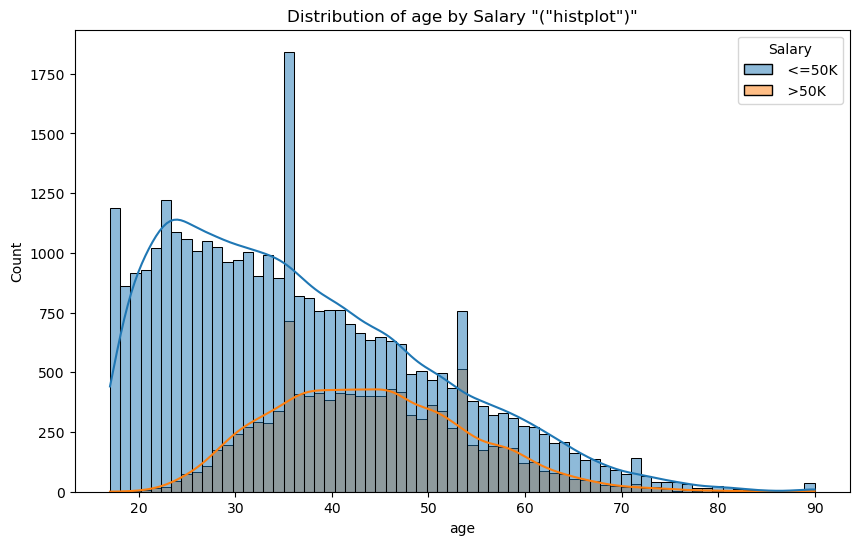

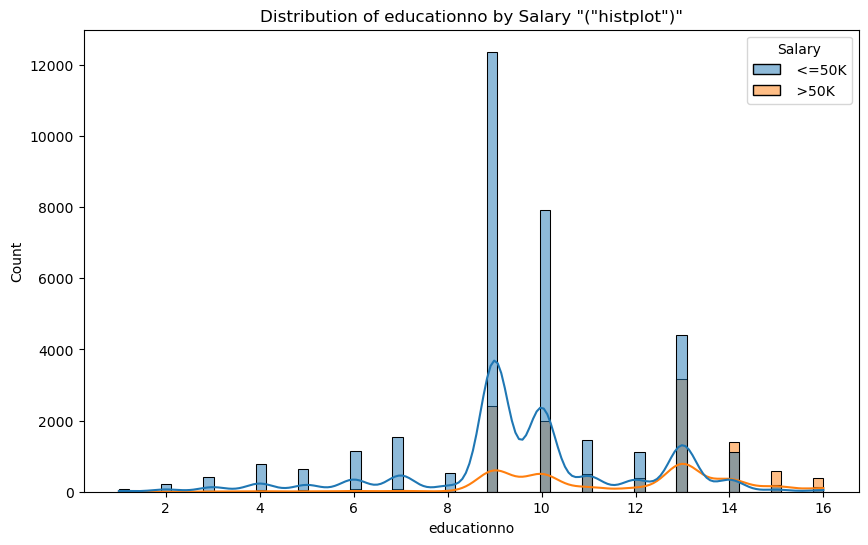

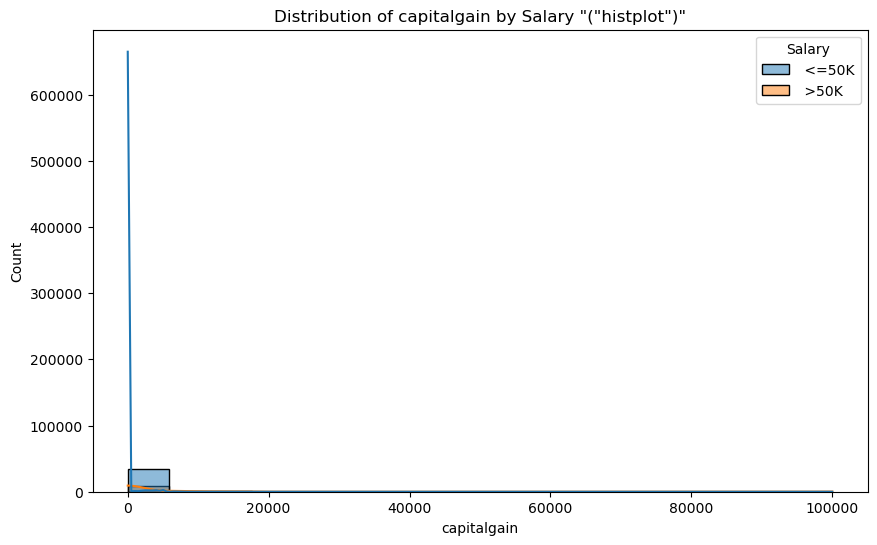

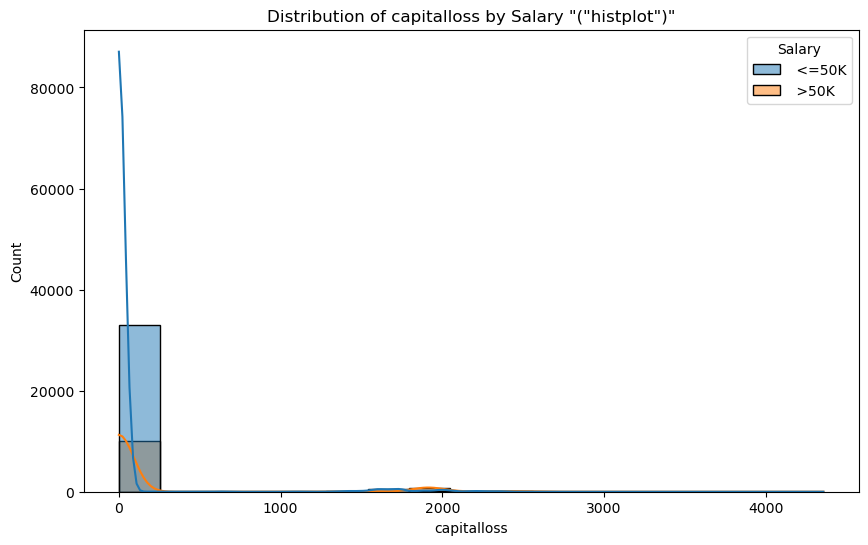

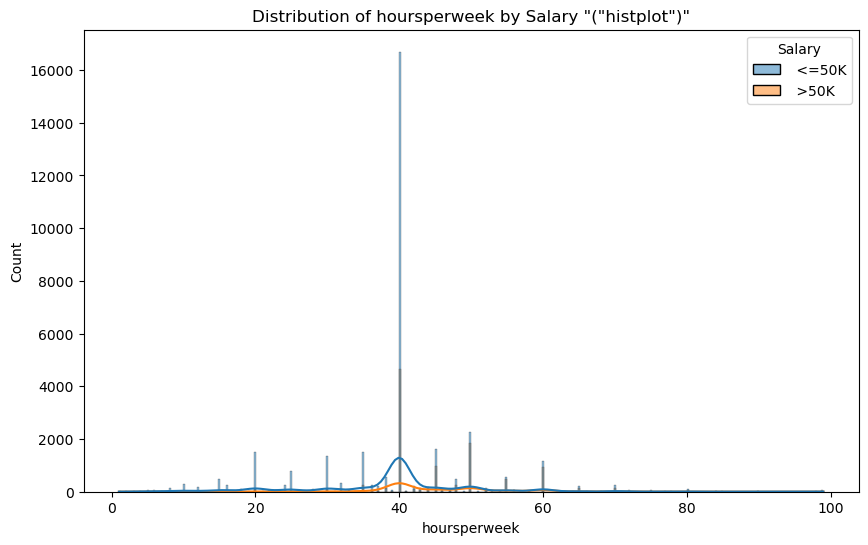

In [2]:
# Distribution of numerical features by Salary
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_data, x=feature, hue='Salary', kde=True)
    plt.title(f'Distribution of {feature} by Salary "("histplot")"')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

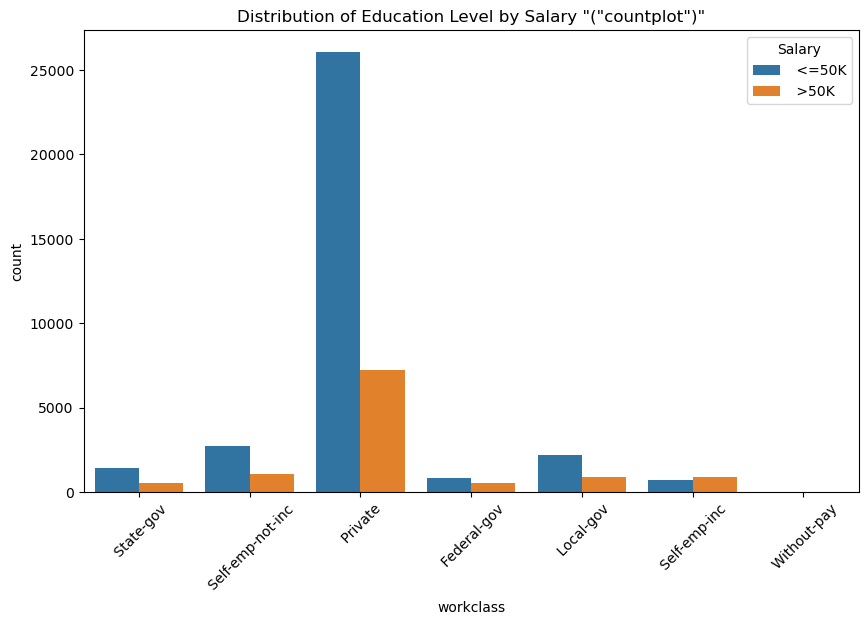

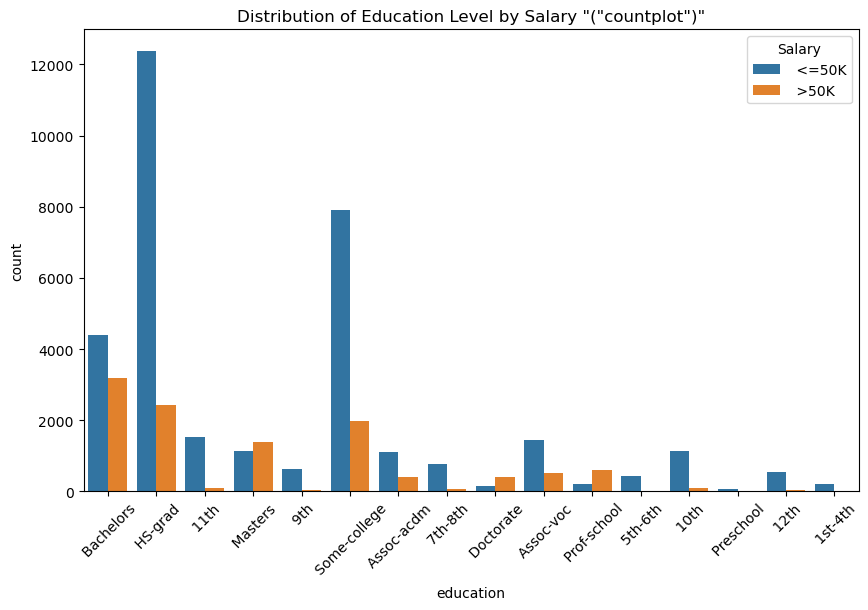

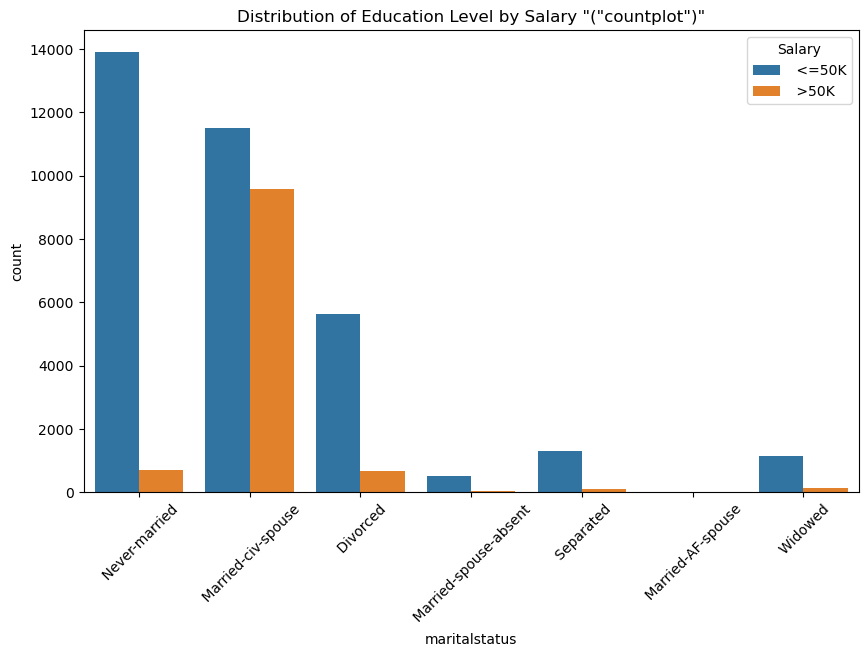

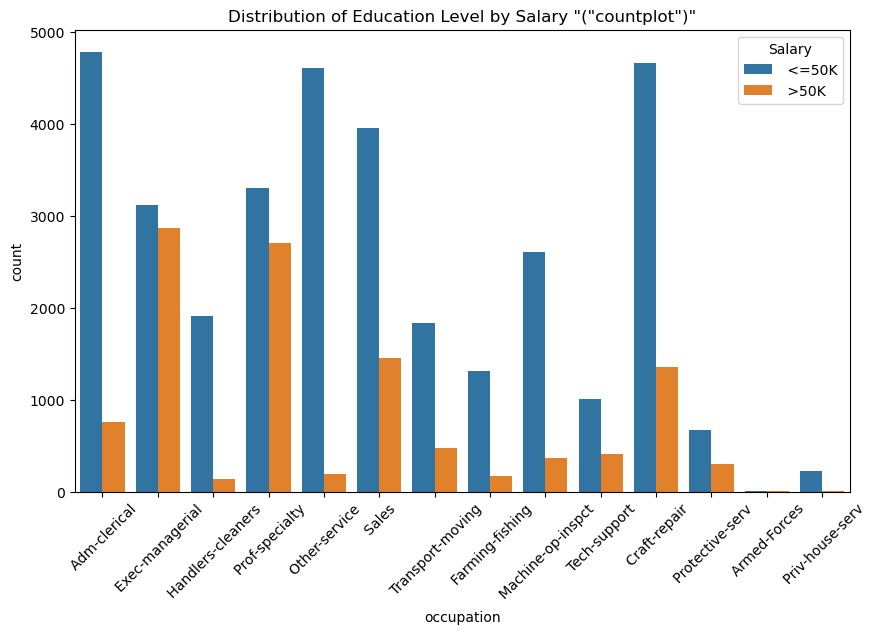

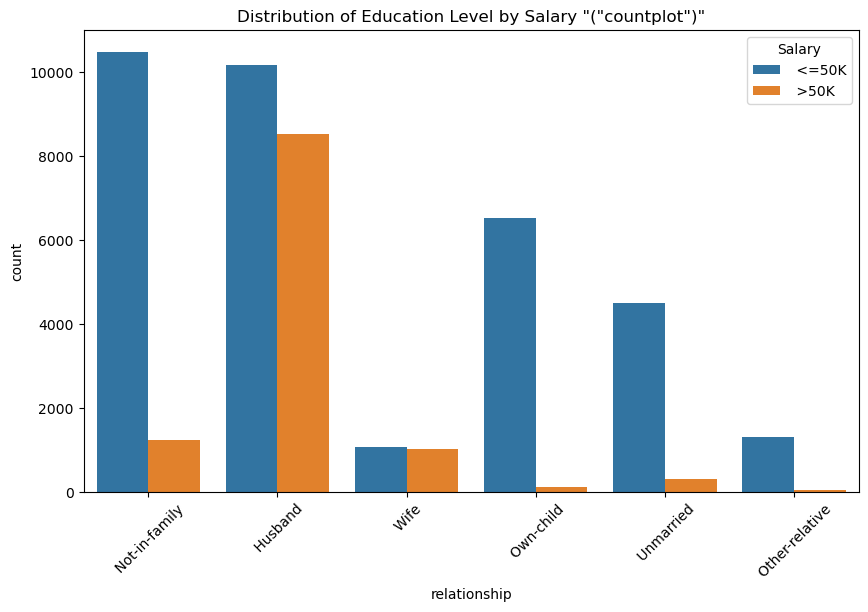

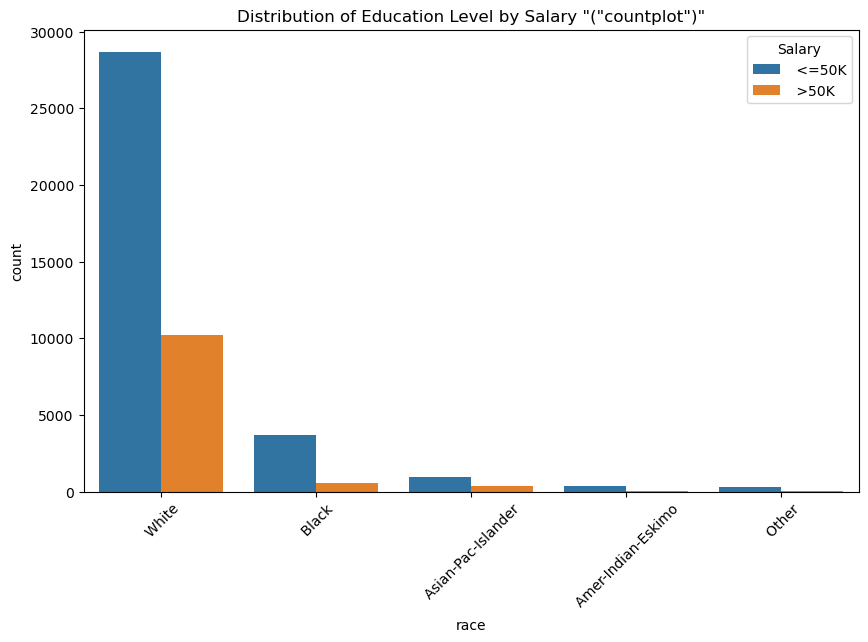

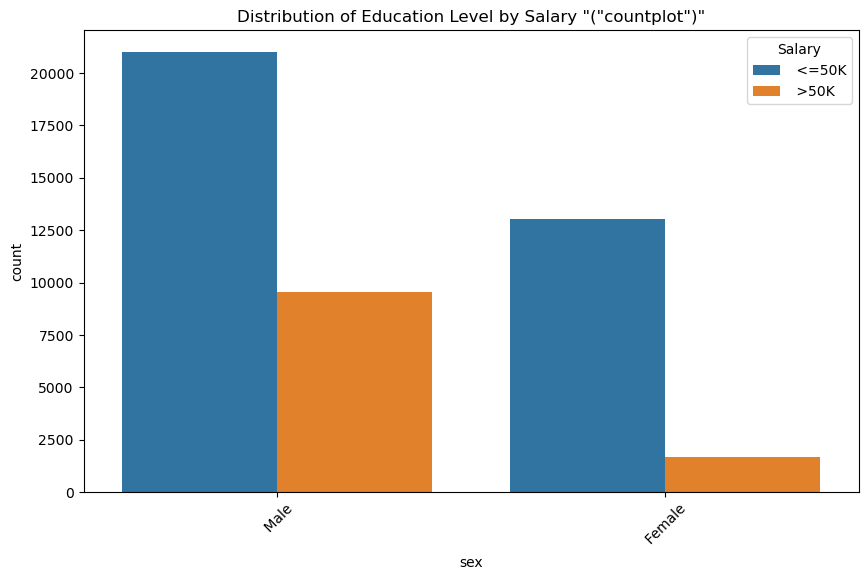

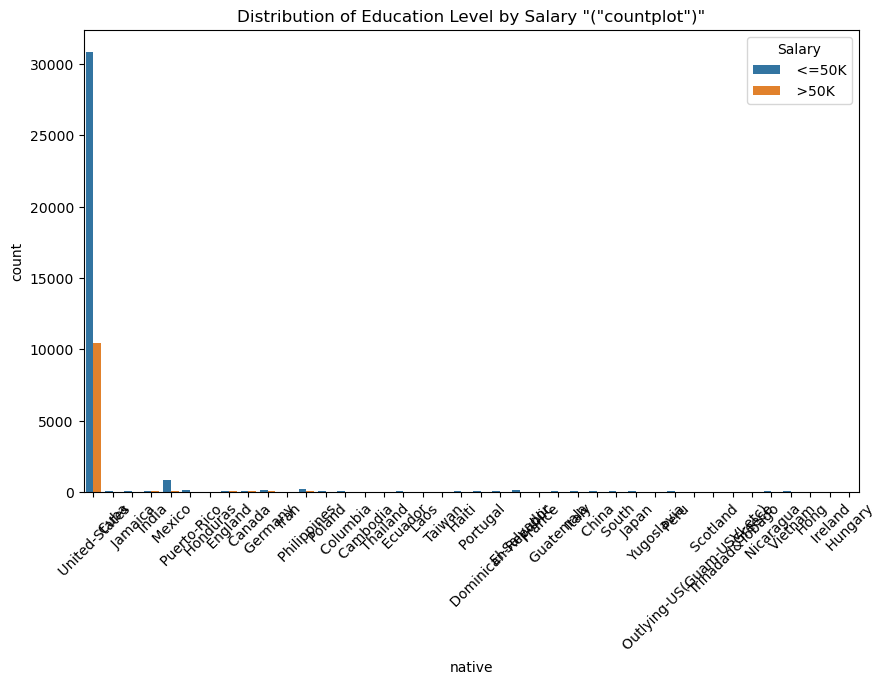

In [3]:
# Count Plots
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Salary', data=combined_data)
    plt.title('Distribution of Education Level by Salary "("countplot")"')
    plt.xticks(rotation=45)
    plt.show()

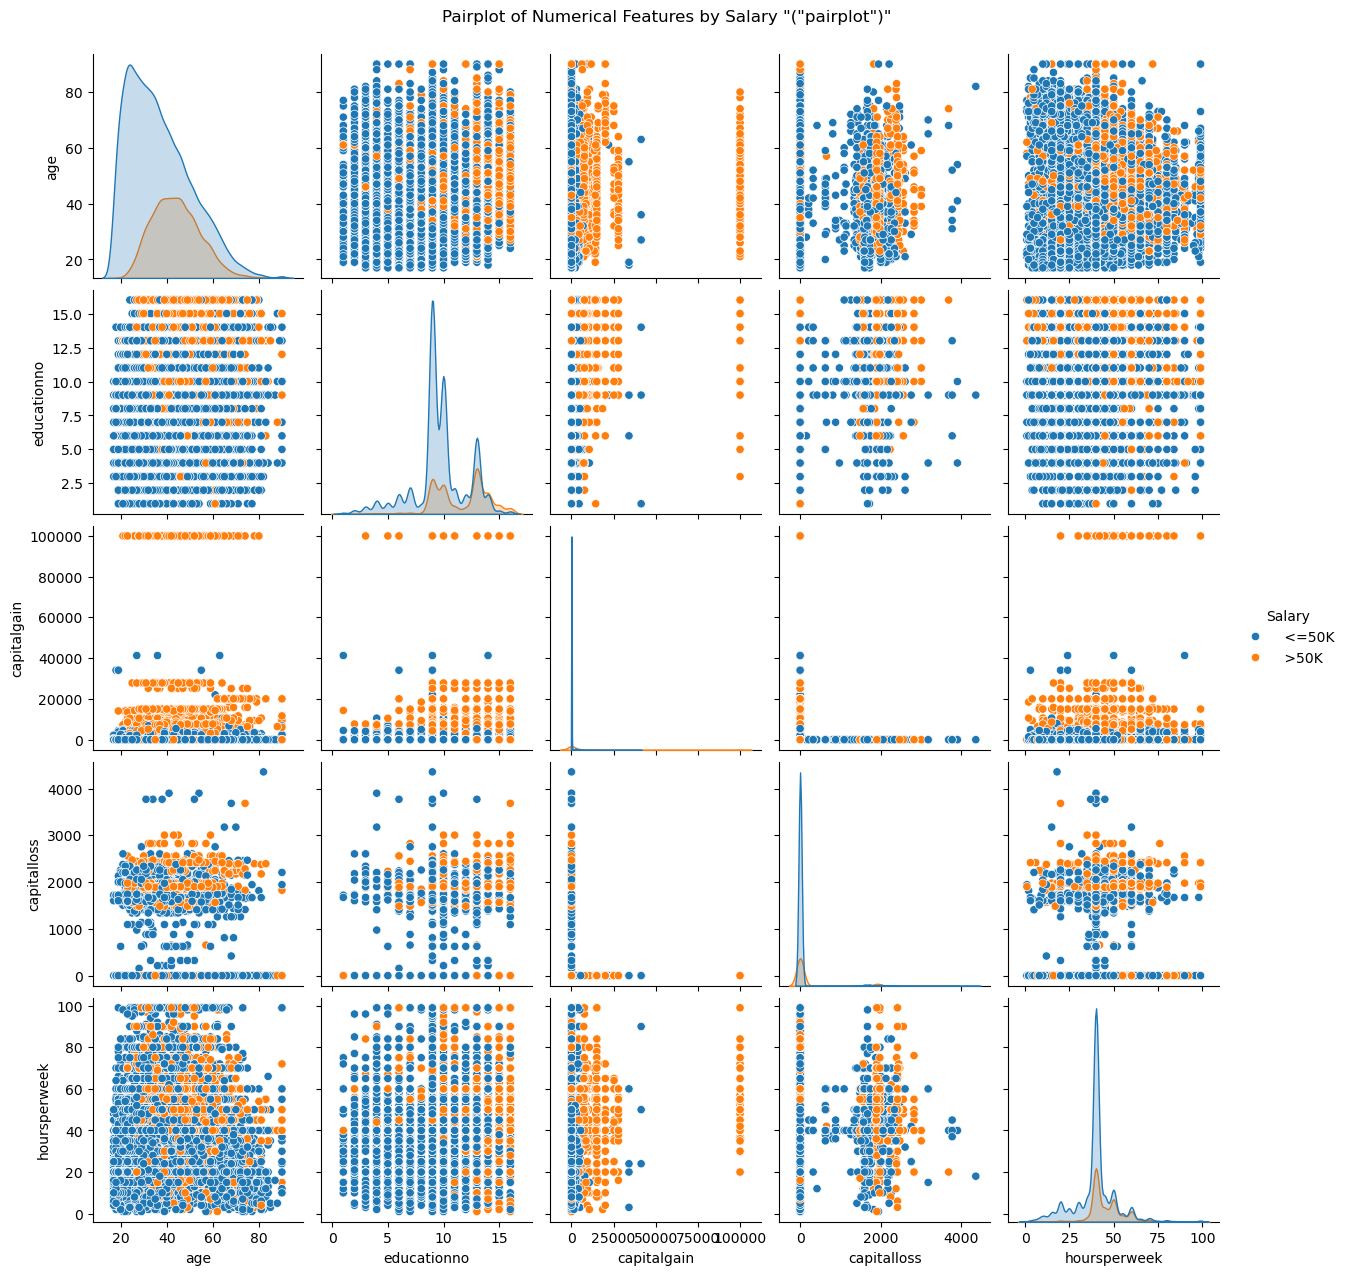

In [4]:
# Pairplot for numerical features
sns.pairplot(combined_data, hue='Salary', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Salary "("pairplot")"', y=1.02)
plt.show()

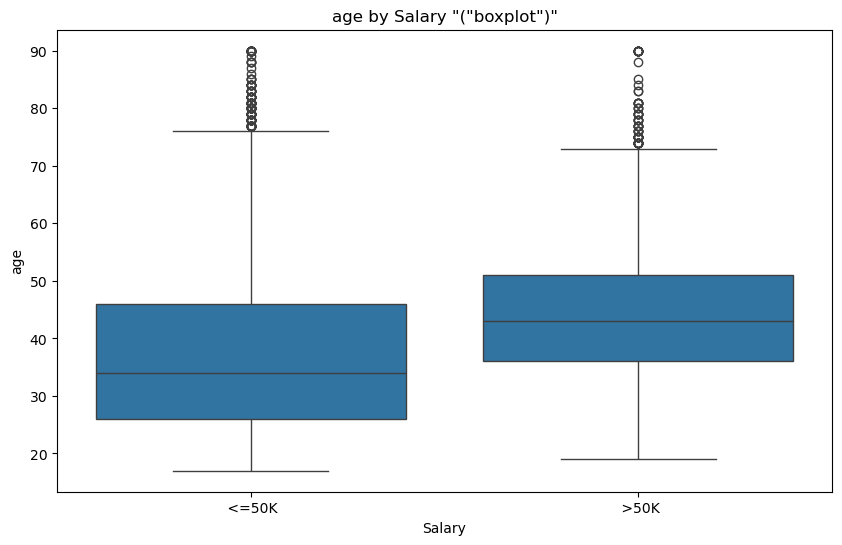

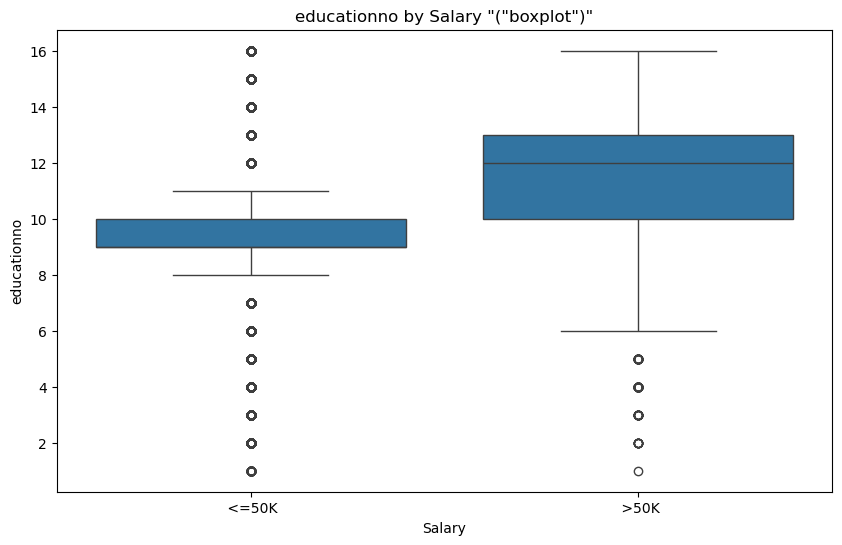

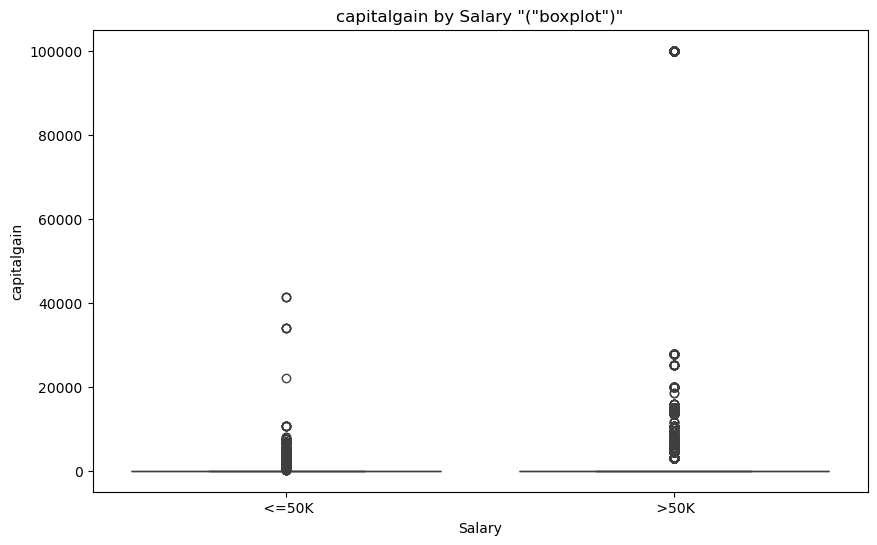

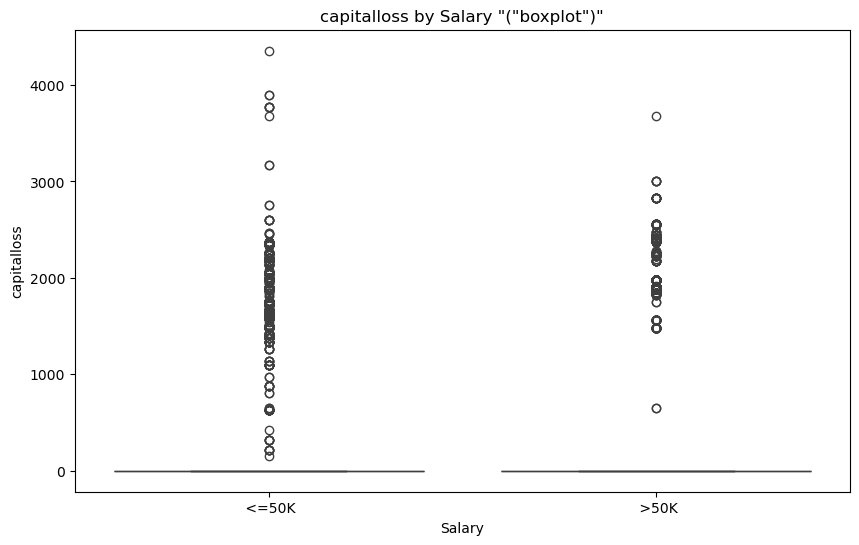

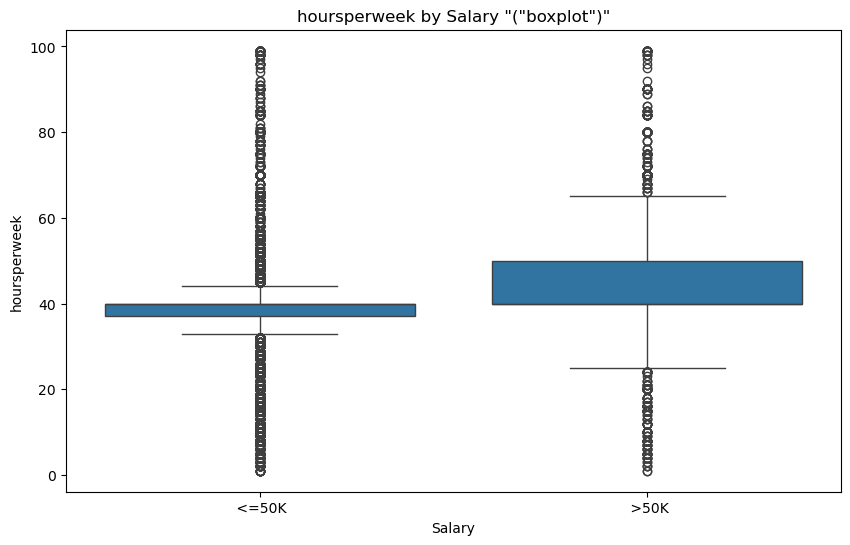

In [5]:
# Boxplot for numerical features by Salary
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Salary', y=feature, data=combined_data)
    plt.title(f'{feature} by Salary "("boxplot")"')
    plt.xlabel('Salary')
    plt.ylabel(feature)
    plt.show()

In [6]:
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers from combined_data
combined_data = remove_outliers_iqr(combined_data, numerical_features)

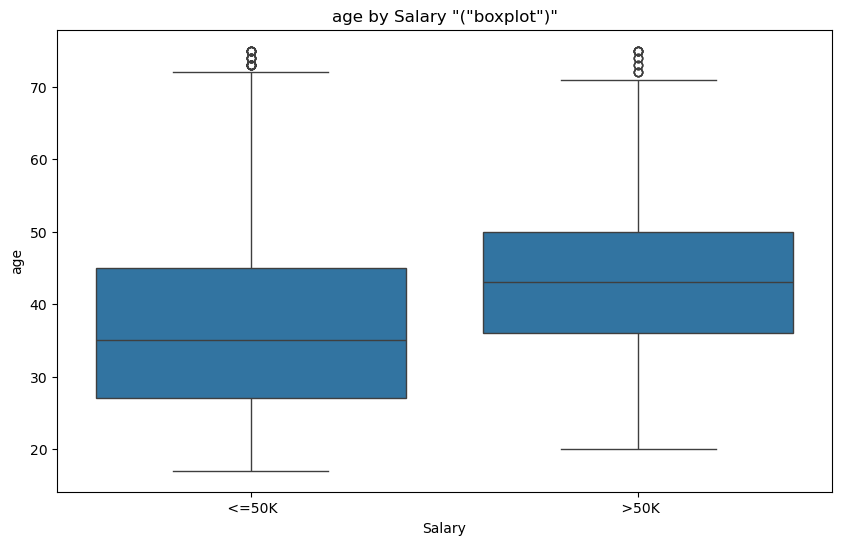

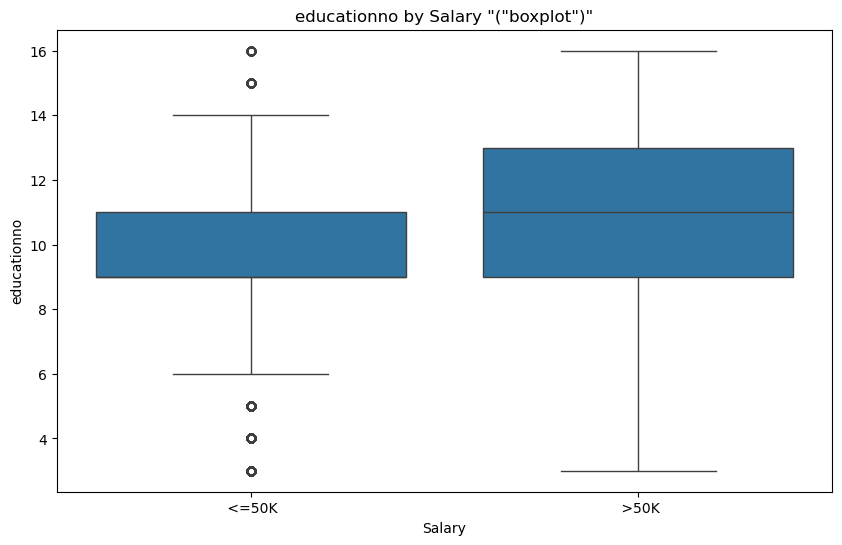

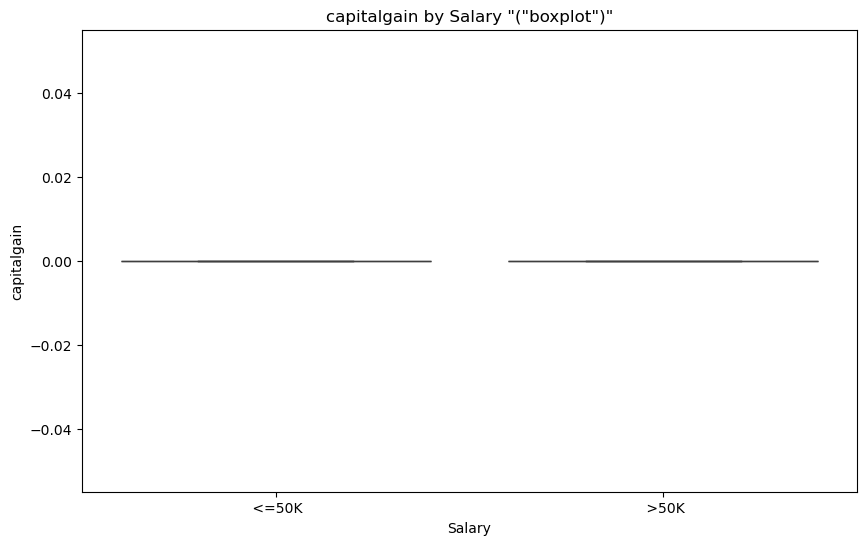

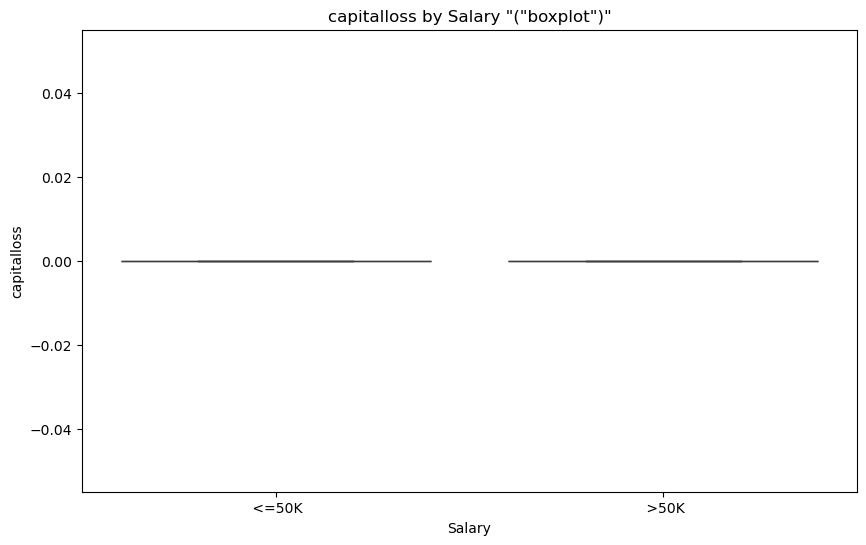

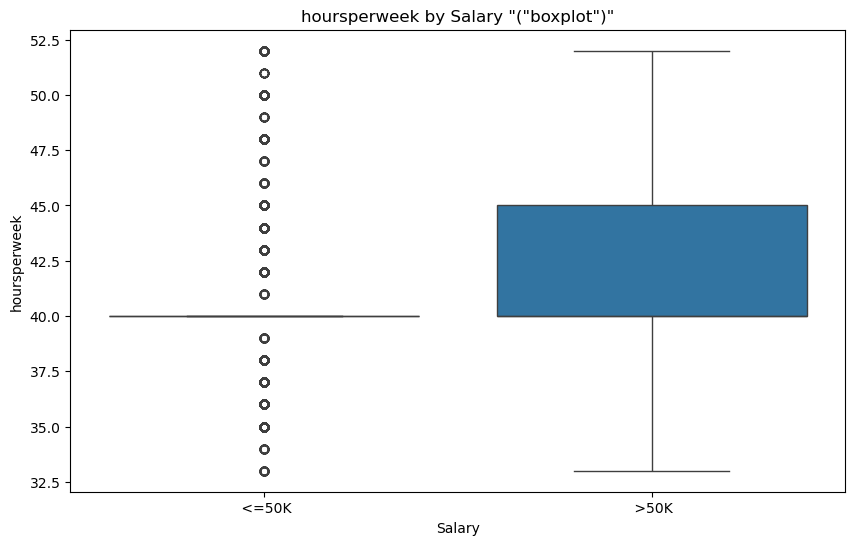

In [7]:
# Visualizing the data after removing outliers

# Boxplot for numerical features by Salary
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Salary', y=feature, data=combined_data)
    plt.title(f'{feature} by Salary "("boxplot")"')
    plt.xlabel('Salary')
    plt.ylabel(feature)
    plt.show()

In [8]:
# Checking value counts for 'capitalgain' column
capitalgain_counts = combined_data['capitalgain'].value_counts()
print("Value counts for 'capitalgain' column:")
print(capitalgain_counts)

# Checking value counts for 'capitalloss' column
capitalloss_counts = combined_data['capitalloss'].value_counts()
print("\nValue counts for 'capitalloss' column:")
print(capitalloss_counts)

Value counts for 'capitalgain' column:
capitalgain
0    28600
Name: count, dtype: int64

Value counts for 'capitalloss' column:
capitalloss
0    28600
Name: count, dtype: int64


In [9]:
# As all the entries in both the 'capitalgain' and 'capitalloss' columns are 0, it might not provide significant information.
# Hence dropping off the columns from the dataset.

# Drop 'capitalgain' and 'capitalloss' columns
combined_data.drop(['capitalgain', 'capitalloss'], axis=1, inplace=True)

numerical_features = [col for col in numerical_features if col not in ['capitalgain', 'capitalloss']]

In [10]:
# Get counts for all columns
column_counts = {}

for column in categorical_columns:
    column_counts[column] = combined_data[column].value_counts()

print("Counts for all columns:")
for column, counts in column_counts.items():
    print(f"\nColumn: {column}")
    print(counts)

Counts for all columns:

Column: workclass
workclass
 Private             21717
 Local-gov            2078
 Self-emp-not-inc     1762
 State-gov            1304
 Federal-gov          1004
 Self-emp-inc          729
 Without-pay             6
Name: count, dtype: int64

Column: education
education
 HS-grad         10253
 Some-college     6066
 Bachelors        4735
 Masters          1423
 Assoc-voc        1358
 Assoc-acdm        990
 11th              846
 10th              756
 7th-8th           514
 9th               477
 12th              339
 5th-6th           323
 Prof-school       285
 Doctorate         235
Name: count, dtype: int64

Column: maritalstatus
maritalstatus
 Married-civ-spouse       13132
 Never-married             8984
 Divorced                  4455
 Separated                 1005
 Widowed                    645
 Married-spouse-absent      361
 Married-AF-spouse           18
Name: count, dtype: int64

Column: occupation
occupation
 Craft-repair         4461
 Adm-cleri

In [11]:
# Remove leading and trailing spaces from 'Salary' column
combined_data['Salary'] = combined_data['Salary'].str.strip()

# Convert Salary to numerical values
combined_data['Salary'] = combined_data['Salary'].map({'<=50K': 0, '>50K': 1})

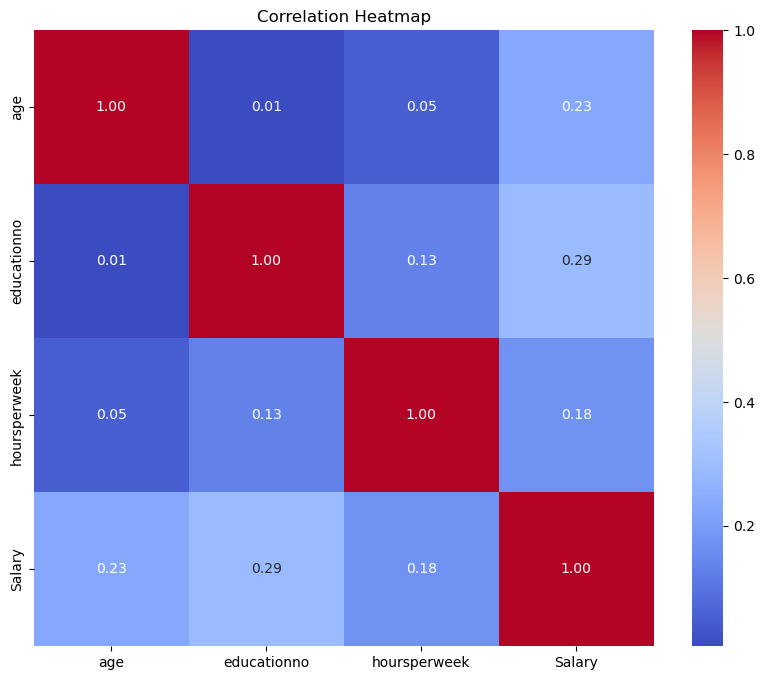

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data[numerical_features + ['Salary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Encoding the categorical columns with LabelEncoder
le = LabelEncoder()

for column in categorical_columns:
    combined_data[column] = le.fit_transform(combined_data[column])

# Select features and target variable for training set
X_train = combined_data.drop('Salary', axis=1)
y_train = combined_data['Salary']

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [14]:
# Naive Bayes models
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'CategoricalNB': CategoricalNB(),
    'ComplementNB': ComplementNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()


Accuracy for GaussianNB: 0.78
Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6775
           1       0.49      0.67      0.57      1805

    accuracy                           0.78      8580
   macro avg       0.70      0.74      0.71      8580
weighted avg       0.82      0.78      0.80      8580

Confusion Matrix for GaussianNB:
[[5522 1253]
 [ 592 1213]]

Accuracy for BernoulliNB: 0.72
Classification Report for BernoulliNB:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      6775
           1       0.40      0.75      0.52      1805

    accuracy                           0.72      8580
   macro avg       0.66      0.73      0.66      8580
weighted avg       0.81      0.72      0.74      8580

Confusion Matrix for BernoulliNB:
[[4792 1983]
 [ 458 1347]]

Accuracy for CategoricalNB: 0.82
Classification Report for CategoricalNB:
           

In [15]:
# Initialize the Naive Bayes model with CategoricalNB as it has the highest accuracy
model = CategoricalNB()

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6775
           1       0.55      0.72      0.62      1805

    accuracy                           0.82      8580
   macro avg       0.73      0.78      0.75      8580
weighted avg       0.84      0.82      0.82      8580



In [16]:
salary_mapping = {0: '<=50K', 1: '>50K'}

temp_y_test = y_test.map(salary_mapping)
temp_y_pred = pd.Series(y_pred)
temp_y_pred = temp_y_pred.map(salary_mapping)

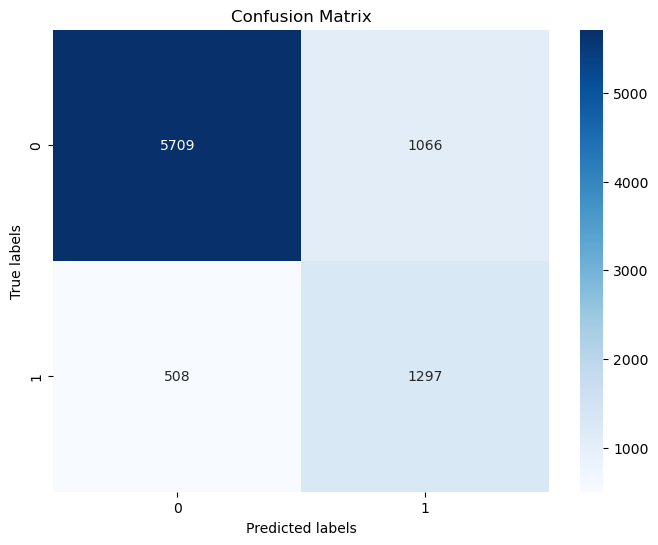

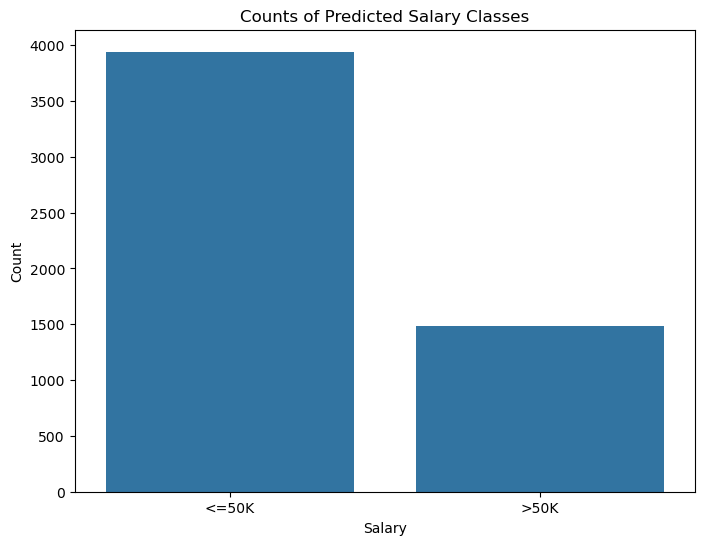

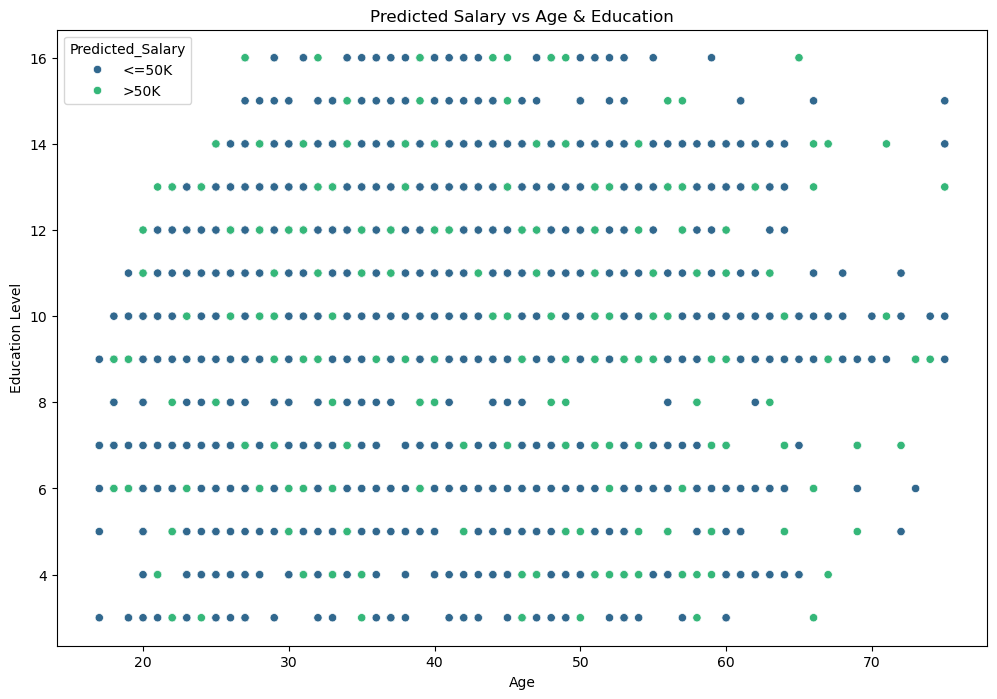

In [17]:
# Model Evaluation
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(temp_y_test, temp_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Prediction Analysis
# Counts of Predicted Salary Classes
combined_data['Predicted_Salary'] = temp_y_pred

plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Salary', data=combined_data)
plt.title('Counts of Predicted Salary Classes')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='educationno', hue='Predicted_Salary', data=combined_data, palette='viridis')
plt.title('Predicted Salary vs Age & Education')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.show()